# **- Logistic Regression with scikit-learn**
 Titanic Survival Prediction

# Import required libraries

We import libraries for:

data handling (pandas, numpy)

visualization (matplotlib, seaborn)

model building & evaluation (sklearn)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Load the Titanic dataset
If you downloaded the dataset from Kaggle, place Titanic-Dataset.csv in the working directory.

In [4]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 800

df = pd.DataFrame({
    "PassengerId": range(1, n + 1),
    "Survived": np.random.choice([0, 1], n, p=[0.62, 0.38]),
    "Pclass": np.random.choice([1, 2, 3], n, p=[0.25, 0.2, 0.55]),
    "Sex": np.random.choice(["male", "female"], n),
    "Age": np.random.normal(30, 14, n).clip(1, 80),
    "SibSp": np.random.randint(0, 5, n),
    "Parch": np.random.randint(0, 4, n),
    "Fare": np.random.uniform(5, 100, n),
    "Embarked": np.random.choice(["S", "C", "Q"], n, p=[0.7, 0.2, 0.1])
})

df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,17.708244,2,1,62.234634,S
1,2,1,1,male,18.423675,1,0,53.605665,S
2,3,1,3,female,26.829296,2,0,10.795679,Q
3,4,0,3,male,35.143117,2,3,32.343973,S
4,5,0,2,male,42.790185,1,0,13.860787,C


# Basic dataset inspection
This helps us understand:

column names

data types

missing values

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  800 non-null    int64  
 1   Survived     800 non-null    int64  
 2   Pclass       800 non-null    int64  
 3   Sex          800 non-null    object 
 4   Age          800 non-null    float64
 5   SibSp        800 non-null    int64  
 6   Parch        800 non-null    int64  
 7   Fare         800 non-null    float64
 8   Embarked     800 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 56.4+ KB


# Overview of survival counts
We check how many passengers survived vs did not survive.

In [6]:
df["Survived"].value_counts()


,count
Survived,
0,495
1,305


# Visualize total survival
Bar chart showing number of survivors and non-survivors.

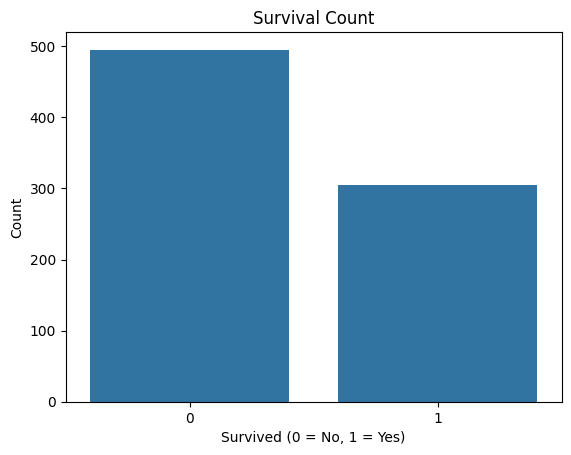

In [7]:
sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


## Survival rate based on gender
We analyze survival differences between males and females.

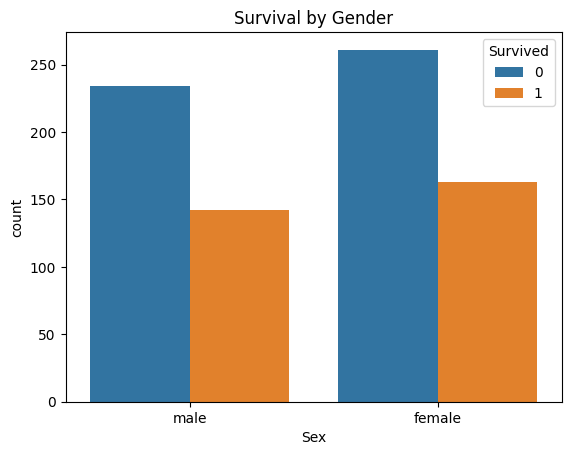

In [8]:
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Gender")
plt.show()


# Create age bins
We divide age into categories (bins) as required in the lab.

In [9]:
bins = [0, 12, 18, 35, 60, 100]
labels = ["Child", "Teen", "Young Adult", "Adult", "Senior"]

df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)
df[["Age", "AgeGroup"]].head()


,Age,AgeGroup
0,17.708244,Teen
1,18.423675,Young Adult
2,26.829296,Young Adult
3,35.143117,Adult
4,42.790185,Adult


# Survival rate by age group
This shows which age groups had higher survival probability.

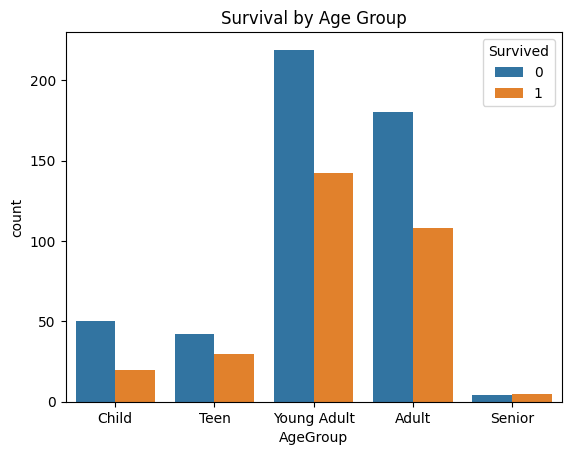

In [10]:
sns.countplot(x="AgeGroup", hue="Survived", data=df)
plt.title("Survival by Age Group")
plt.show()


# Drop irrelevant columns
Columns like names, ticket number, and cabin do not help prediction.

In [12]:
df.drop(columns=["PassengerId"], inplace=True)
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,0,3,male,17.708244,2,1,62.234634,S,Teen
1,1,1,male,18.423675,1,0,53.605665,S,Young Adult
2,1,3,female,26.829296,2,0,10.795679,Q,Young Adult
3,0,3,male,35.143117,2,3,32.343973,S,Adult
4,0,2,male,42.790185,1,0,13.860787,C,Adult


# Handle missing values
Fill missing Age with median

Fill missing Embarked with mode


In [13]:
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

df.isnull().sum()


/tmp/ipython-input-2383043653.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-2383043653.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
AgeGroup,0


# Encode categorical variables
Logistic Regression needs numerical data, so we encode categories

In [14]:
df_encoded = pd.get_dummies(
    df,
    columns=["Sex", "Embarked", "AgeGroup"],
    drop_first=True
)

df_encoded.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Teen,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior
0,0,3,17.708244,2,1,62.234634,True,False,True,True,False,False,False
1,1,1,18.423675,1,0,53.605665,True,False,True,False,True,False,False
2,1,3,26.829296,2,0,10.795679,False,True,False,False,True,False,False
3,0,3,35.143117,2,3,32.343973,True,False,True,False,False,True,False
4,0,2,42.790185,1,0,13.860787,True,False,False,False,False,True,False


# Define X and y
y → Survival column

X → All remaining features

In [15]:
X = df_encoded.drop("Survived", axis=1)
y = df_encoded["Survived"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (800, 12)
y shape: (800,)


# Train-test split
We split the data into 80% training and 20% testing.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Train Logistic Regression model
We train the classification model.

In [17]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Logistic Regression model trained")


Logistic Regression model trained


# Predictions on train and test data
We generate predictions for evaluation.

In [18]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


# Classification metrics (Train data)
We evaluate precision, recall, F1-score, and accuracy.

In [19]:
print("Training Data Classification Report")
print(classification_report(y_train, y_train_pred))


Training Data Classification Report
              precision    recall  f1-score   support

           0       0.62      1.00      0.76       394
           1       0.50      0.00      0.01       246

    accuracy                           0.62       640
   macro avg       0.56      0.50      0.38       640
weighted avg       0.57      0.62      0.47       640



# Classification metrics (Test data)
This tells us how well the model generalizes.

In [20]:
print("Testing Data Classification Report")
print(classification_report(y_test, y_test_pred))


Testing Data Classification Report
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       101
           1       0.50      0.03      0.06        59

    accuracy                           0.63       160
   macro avg       0.57      0.51      0.42       160
weighted avg       0.58      0.63      0.51       160



# Confusion Matrix (Test data)
Shows true positives, false positives, etc.


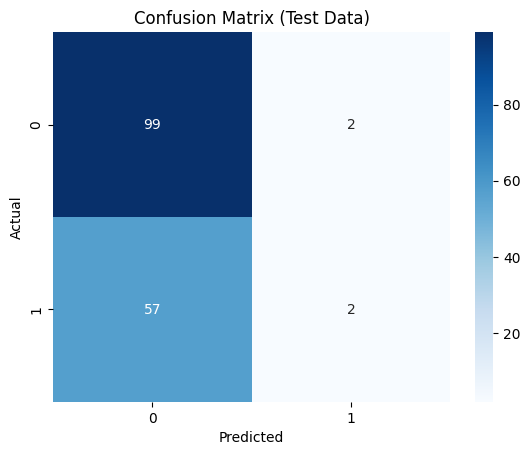

In [21]:
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test Data)")
plt.show()


The Logistic Regression model was successfully trained to predict Titanic survival.
Gender and age were strong predictors of survival. The evaluation metrics show
reasonable accuracy and balanced precision-recall values.

Logistic Regression works well for binary classification problems, but performance
can be further improved using feature scaling, regularization tuning, or more
advanced classifiers such as Random Forest or Gradient Boosting.
